# Airline Customer Loyalty Program and Engagement Analysis

## 1. Data Exploration and Cleaning

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the Data sets
flg_act = pd.read_csv("Customer Flight Activity.csv", parse_dates=True)
lyt_hist = pd.read_csv("Customer Loyalty History.csv", parse_dates=True)

flg_act.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [3]:
flg_act.shape

(392936, 8)

In [4]:
flg_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [5]:
# Checking for nulls
flg_act.isnull().sum()

,0
Loyalty Number,0
Year,0
Month,0
Total Flights,0
Distance,0
Points Accumulated,0
Points Redeemed,0
Dollar Cost Points Redeemed,0


In [6]:
# Checking for duplicates
flg_act[flg_act.duplicated()]

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
176809,357901,2018,2,0,0,0.0,0,0
176811,357901,2018,3,0,0,0.0,0,0
176813,357901,2018,4,0,0,0.0,0,0
176819,357901,2018,9,0,0,0.0,0,0
176822,357901,2018,11,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...
389816,732304,2018,3,0,0,0.0,0,0
389818,732304,2018,4,0,0,0.0,0,0
392342,951353,2018,2,0,0,0.0,0,0
392344,951353,2018,3,0,0,0.0,0,0


In [7]:
flg_act = flg_act.drop_duplicates()
flg_act.shape

(391014, 8)

In [8]:
lyt_hist.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [9]:
lyt_hist.shape

(16737, 16)

In [10]:
lyt_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [11]:
# Checking for nulls
lyt_hist.isnull().sum()

,0
Loyalty Number,0
Country,0
Province,0
City,0
Postal Code,0
Gender,0
Education,0
Salary,4238
Marital Status,0
Loyalty Card,0


In [12]:
# Checking for duplicates
lyt_hist[lyt_hist.duplicated()]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


## 2. Statistical Analysis

In [13]:
# Exploring the descriptive statistics of the variables
flg_act.describe(include='all')

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,391014.000000,391014.000000,391014.000000,391014.000000,391014.000000,391014.000000,391014.000000,391014.000000
mean,550376.476648,2017.514038,6.514971,1.301253,1950.983205,2037.136759,31.458137,5.663362
std,258621.151837,0.499804,3.445263,1.965387,3245.061634,3879.029192,126.945609,22.853705
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327498.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551710.000000,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,772152.000000,2018.000000,10.000000,2.000000,3040.000000,3060.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,28.000000,67284.000000,100926.000000,876.000000,158.000000


In [14]:
# Exploring the descriptive statistics of the variables
lyt_hist.describe(include='all')

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,16737,16737,16737,16737,16737,16737,12499.000000,16737,16737,16737.000000,16737,16737.000000,16737.000000,2067.000000,2067.000000
unique,NaN,1,11,29,55,2,5,NaN,3,3,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,NaN,Married,Star,NaN,Standard,NaN,NaN,NaN,NaN
freq,NaN,16737,5404,3351,911,8410,10475,NaN,9735,7637,NaN,15766,NaN,NaN,NaN,NaN
mean,549735.880445,NaN,NaN,NaN,NaN,NaN,NaN,79245.609409,NaN,NaN,7988.896536,NaN,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,NaN,NaN,NaN,NaN,NaN,NaN,35008.297285,NaN,NaN,6860.982280,NaN,1.979111,3.398958,1.380743,3.455297
min,100018.000000,NaN,NaN,NaN,NaN,NaN,NaN,-58486.000000,NaN,NaN,1898.010000,NaN,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,NaN,NaN,NaN,NaN,NaN,NaN,59246.500000,NaN,NaN,3980.840000,NaN,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,NaN,NaN,NaN,NaN,NaN,NaN,73455.000000,NaN,NaN,5780.180000,NaN,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,NaN,NaN,NaN,NaN,NaN,NaN,88517.500000,NaN,NaN,8940.580000,NaN,2017.000000,10.000000,2018.000000,10.000000


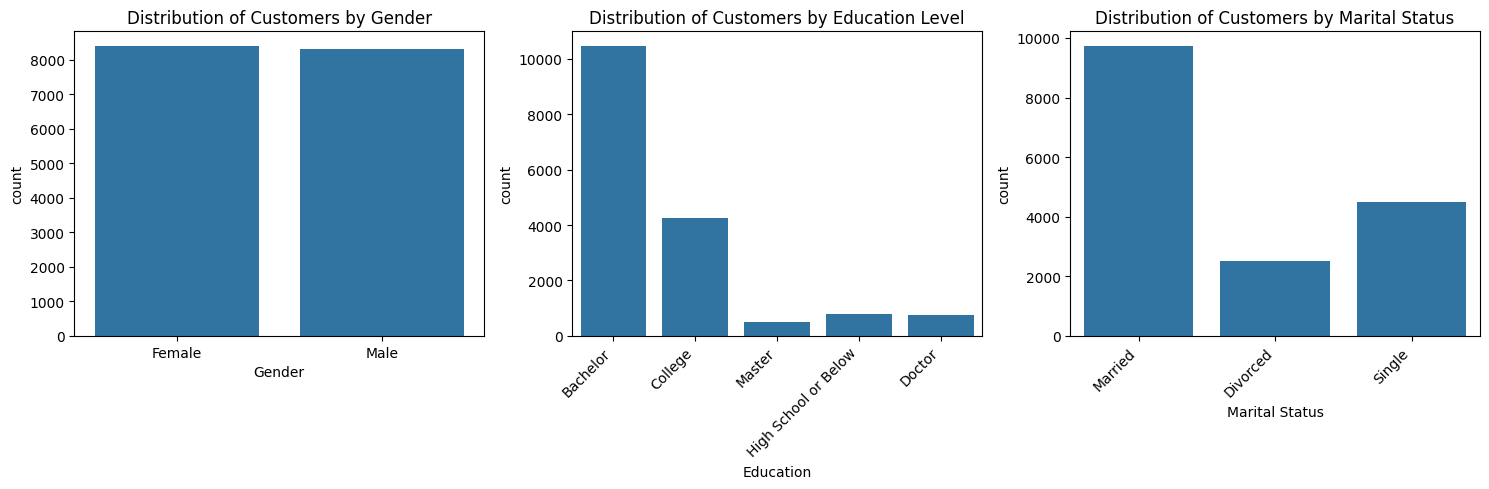

In [15]:
# combined_df = pd.merge(flg_act, lyt_hist, on='CustomerID', how='inner')

# Create the bar chart
plt.figure(figsize=(15, 5))

# Gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=lyt_hist)
plt.title('Distribution of Customers by Gender')

# Education level distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Education', data=lyt_hist)
plt.title('Distribution of Customers by Education Level')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Marital status distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Marital Status', data=lyt_hist)
plt.title('Distribution of Customers by Marital Status')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

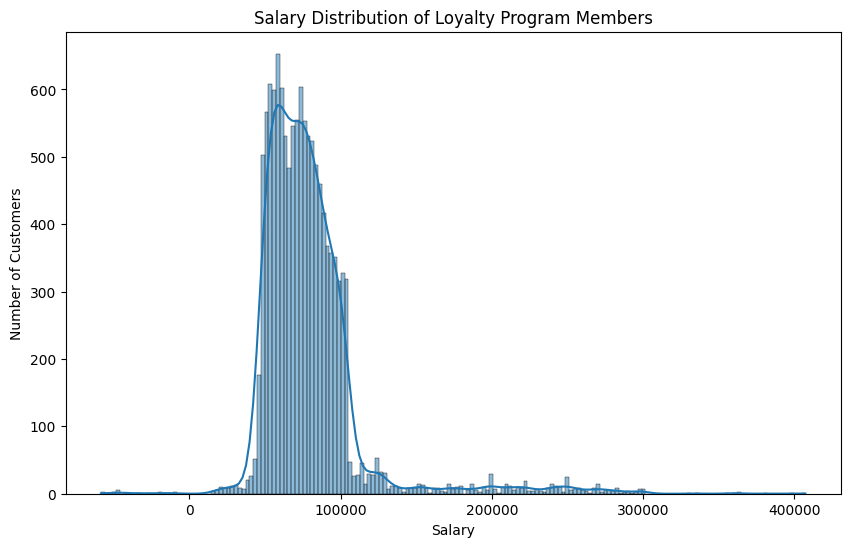

In [16]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(lyt_hist['Salary'], kde=True)  # Use 'Annual Income' column
plt.title('Salary Distribution of Loyalty Program Members')
plt.xlabel('Salary')
plt.ylabel('Number of Customers')
plt.show()

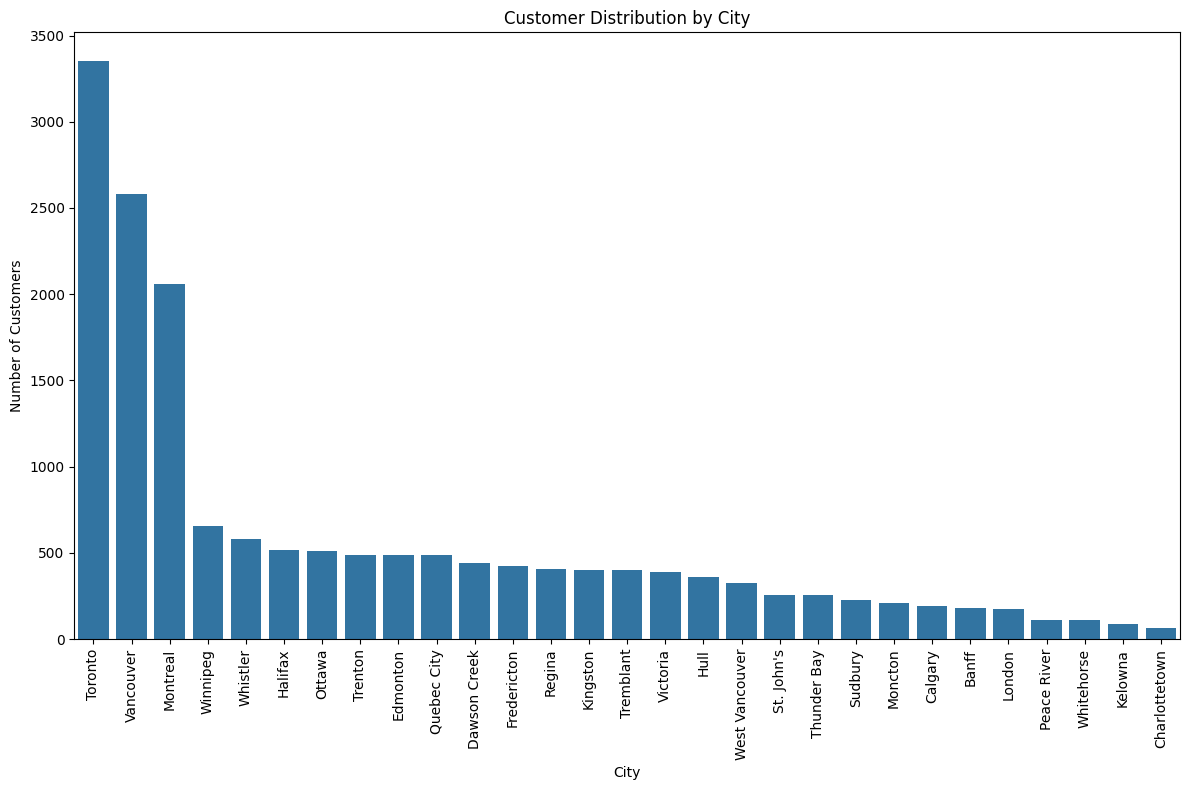

In [17]:
# Geographical Map: Customer distribution by province or city
plt.figure(figsize=(12, 8))

if 'City' in lyt_hist.columns:
    city_counts = lyt_hist['City'].value_counts()
    sns.barplot(x=city_counts.index, y=city_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel('City')
    plt.ylabel('Number of Customers')
    plt.title('Customer Distribution by City')

elif 'Province' in lyt_hist.columns:
    province_counts = lyt_hist['Province'].value_counts()
    sns.barplot(x=province_counts.index, y=province_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel('Province')
    plt.ylabel('Number of Customers')
    plt.title('Customer Distribution by Province')

else:
    print("No 'City' or 'Province' column found in the dataset.")

plt.tight_layout()
plt.show()